# Nicholas Bonet

# CMP464 Final Project - Boston Housing Dataset

Project idea came from the following competition: https://www.kaggle.com/c/boston-housing/overview/description

For this data set, we are aiming to predict the median value of houses in Boston based on a few different features. As such, I will be utilizing linear regression/regression based models for the task, and evaluate the models based on RMSE, which is also how Kaggle is validating the predictions for the competition. My conclusion will go over my thoughts of how each of the models stacked up against each other based on my submission results to Kaggle.

In [1]:
# Import basic libraries to use throughout the project

import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns # a library I read about for data visualization, wanted to try it out

%matplotlib inline

In [2]:
# The data set is provided by scikit-learn, going to import and load from there
from sklearn.datasets import load_boston
boston_housing = load_boston()

In [3]:
# Output the description of features in the data set
print(boston_housing.DESCR)

# For reference, MEDV is our target variable for this data set, which will be predicted later on through linear regression

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
# Now I'll move the dataset into a pandas data frame for further use/analyzing
boston_pd = pd.DataFrame(boston_housing.data, columns=boston_housing.feature_names)
boston_pd['MEDV'] = boston_housing.target # add target variable to the dataframe as well
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Check over the data for any null/missing values
print(boston_pd.isnull().values.any())
boston_pd.info()

False
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<function matplotlib.pyplot.show(*args, **kw)>

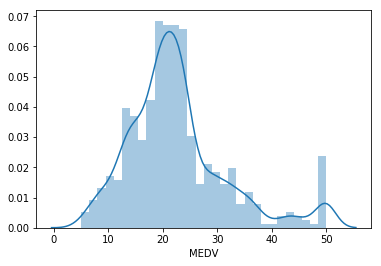

In [6]:
# Since the dataset doesn't seem to have any missing values, I'll move on to visualizing the data to understand
# how it all affects the median value of a house

# Distributed plot of the target variable MEDV
sns.distplot(boston_pd['MEDV'], bins=30)
plt.show

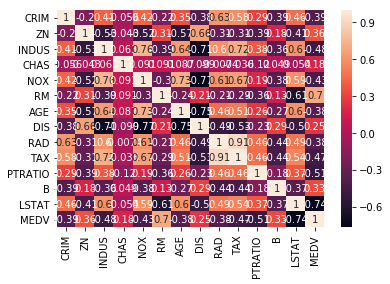

In [7]:
# As shown above, median value seems to take the shape of a standard normal curve for the most part
# Though there are still outliers

# Visualized correlation matrix of all the features
boston_corr = boston_pd.corr()
sns.heatmap(data=boston_corr, annot=True)

Text(0, 0.5, 'MEDV')

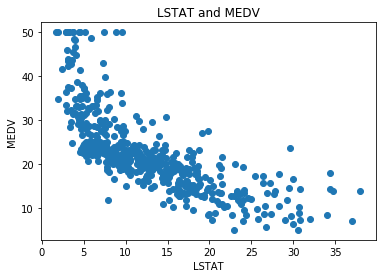

In [8]:
# From a quick glance up above, you can see that LSTAT and RM are highly correlated (negatively/positively, respective) with MEDV.
# PTRATIO is another possibility for use in training my model

# Scatter plot between MEDV/LSTAT
x = boston_pd['LSTAT']
y = boston_pd['MEDV']

plt.scatter(x, y)
plt.title('LSTAT and MEDV')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

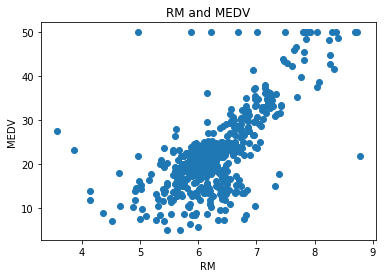

In [9]:
# Scatter plot between MEDV/RM
x = boston_pd['RM']
y = boston_pd['MEDV']

plt.scatter(x, y)
plt.title('RM and MEDV')
plt.xlabel('RM')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

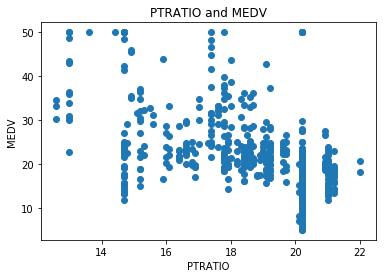

In [10]:
# Scatter plot between MEDV/RM
x = boston_pd['PTRATIO']
y = boston_pd['MEDV']

plt.scatter(x, y)
plt.title('PTRATIO and MEDV')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')

In [11]:
# Some quick things to note about the 3 graphs up above:
# As LSTAT increases, MEDV seems to decrease for the large majority
# As for RM and MEDV, it seems that when RM increases, MEDV increases as well
# As for PTRATIO and MEDV, it looks as if MEDV leans between not much of a change, or decreasing when PTRATIO increases.

# How does this help me? Well, I will mostly focus on LSTAT and RM when building my initial model/test, and then try
# factoring in PTRATIO and possibly other features to see how it affects the model's performance

# Now that I have more insight on how to build this model, I'll start prepping the dataframe to fit the LinearRegression model with
boston_lr_1 = boston_pd.drop(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'AGE', 'DIS', 'RAD', 'B'], axis=1)

In [12]:
# Confirm only the data 3 columns I want (RM, LSTAT, MEDV) are present
boston_lr_1.head()

,RM,TAX,PTRATIO,LSTAT,MEDV
0,6.575,296.0,15.3,4.98,24.0
1,6.421,242.0,17.8,9.14,21.6
2,7.185,242.0,17.8,4.03,34.7
3,6.998,222.0,18.7,2.94,33.4
4,7.147,222.0,18.7,5.33,36.2


In [13]:
# ADDED AFTER FIRST 3 KAGGLE SUBMISSIONS
# Standardize the data left in the set to see if I get better results in term of overall performance/RMSE
from sklearn.preprocessing import StandardScaler

boston_lr_1_Y = boston_lr_1['MEDV']
boston_lr_1_X = boston_lr_1.drop(['MEDV'], axis=1)


scaler = StandardScaler().fit(boston_lr_1_X)
scaled_boston_lr_1_X = scaler.transform(boston_lr_1_X)

In [14]:
# Now I can split the new dataframe into a train/test set
from sklearn.model_selection import train_test_split

train_set_X, test_set_X, train_set_Y, test_set_Y = train_test_split(scaled_boston_lr_1_X, boston_lr_1_Y, test_size=0.20)

In [15]:
# Now that the set has been split into training/test, I'll fit the data to a LinearRegression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_set_X, train_set_Y)

# Now we try out the above model with the test set and see how it performs
# For this project, I will be using mostly RMSE to measure performance
from sklearn.metrics import mean_squared_error

test_set_predict = model.predict(test_set_X)
rmse = np.sqrt(mean_squared_error(test_set_Y, test_set_predict))

print(rmse)

5.2118223819576235


In [16]:
# Testing out SGDRegressor as well for the data set just to see what sort of RMSE is produced

from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor()
sgd.fit(train_set_X, train_set_Y)

test_set_predict = sgd.predict(test_set_X)
rmse = np.sqrt(mean_squared_error(test_set_Y, test_set_predict))

print(rmse)

5.27339649665588


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


# Some observations after first 3 Kaggle test submissions

At this point in the project, I submitted 3 prediction files to Kaggle based on the regular LinearRegression model alone.
![Kaggle Results Image](https://i.imgur.com/4neWNKH.png)

As shown above, my RMSE decreased as I increased the number of features I trained with (based on their correlation to MEDV).
I am sure that I can bring this down further by testing other linear regressiion based models and fine tuning 1 or 2 of them, and also by applying StandardScaler to the dataset to normalize the outliers in the data, which I will test out in the next few sections of the notebook before my final conclusion.

# Improvements after applying StandardScaler
After scaling/normalizing all of the data, the RMSE of each test I ran in the above screenshot decreased a bit
![Kaggle Scaled Results Image](https://i.imgur.com/FmPGxYh.png)

The top most result came from using SGDRegressor, as it started to produce a lower RMSE than the normal LinearRegression model. Now that I have standardized data to test with, I'll try out some other regression models and fine tune them to see how low I can get in terms of RMSE.

In [17]:
# Did some research, and came across GBR as a good candidate for this sort of problem
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(train_set_X, train_set_Y)

test_set_predict = gbr.predict(test_set_X)
rmse = np.sqrt(mean_squared_error(test_set_Y, test_set_predict))

print(rmse)

3.052934322456162


# Some insight about GradientBoostingRegressor
Trying out GBR on it's own without fine tuning proved to be quite a good fit for this problem, as RMSE dropped from the 4.5-4.7 range all the way down to ~3.0:
![GBR Kaggle Result 1](https://i.imgur.com/EbzSPP0.png)

That result alone would leave me at #5 in the competition if it were still open, which is quite good. As a last effort, I'll go ahead and try fine tuning the GBR model more with GridSearch, and see if I can achieve a lower RMSE.

In [18]:
# Begin to fine tune GBR
from sklearn.model_selection import GridSearchCV
gbr_ft = GradientBoostingRegressor()
# Did some research on this part for the parameter grid for recommended values
grid_search = GridSearchCV(estimator=gbr_ft, param_grid={'n_estimators':[100], 'learning_rate': [0.2], 'max_depth':[6], 'max_features':[1.0], 'min_samples_leaf':[3]}, scoring='neg_mean_squared_error', n_jobs=-1, cv=10)
grid_search.fit(train_set_X, train_set_Y)
best_model = grid_search.best_estimator_      

test_set_predict = best_model.predict(test_set_X)
rmse = np.sqrt(mean_squared_error(test_set_Y, test_set_predict))

print(rmse)

3.6958528742461767


C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [19]:
# Testing model with Kaggle test set for submission
# Import test set from CSV, drop other columns I didn't use
kaggle_set = pd.read_csv('kaggle_test.csv')
kaggle_set = kaggle_set.drop(['crim', 'zn', 'indus', 'chas', 'nox', 'age', 'dis', 'rad', 'black'], axis=1)

# Save ID column for export later then drop from set
kaggle_id = kaggle_set['ID']
kaggle_set = kaggle_set.drop(['ID'], axis=1)

# Apply StandardScaler to test set
kaggle_scaler = StandardScaler().fit(kaggle_set)
kaggle_scaled = kaggle_scaler.transform(kaggle_set)

# Make predictions based on GBR fined tuned (first used LinearRegression, then SGDRegressor, then regular GBR)
kaggle_predict = best_model.predict(kaggle_scaled)

# Prepare data for export to CSV for Kaggle evaluation
kaggle_export = pd.DataFrame(kaggle_id)
kaggle_export['MEDV'] = kaggle_predict

# Export to CSV for submission to Kaggle
kaggle_export.to_csv('kaggle_predict.csv', index=False)

C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\nbonet\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


# And now we reach a conclusion!
After a quick test with using GBR fine tuned by GridSearch, I arrive at this rather nice result:
![GBR Kaggle Result 2](https://i.imgur.com/3RFGeQO.png)
I managed to break under 3.0 RMSE after the GridSearch test, which I am quite satisfied with, especially with the ~5.0+ results I started out with. I can probably fine tune the parameter grid a bit more, but compared to the results on the leaderboard, I am very satisfied.

Now for the main takeaways from this project:

- Visualizing and analyzing the data certainly helped picked key features that would contribute the most in predicting the median value, after testing a few times I stuck with using LSTAT, RM, PTRATIO, and TAX as my 4 input features, as they held the most correlation to MEDV compared to the others, and also led me to a lower RMSE in the grand scheme of things.

- Once I had the useful features all figured out, standard scaling definitely served to improve resulting RMSE from my tests, as there were some outliers in the data, which would of course offset the predicted MEDV value.

- The greatest factor in RMSE difference was my choice in regression model, going from LinearRegression -> SGDRegressor improved results a bit, but the real improvement was from using GradientBoostingRegressor. I searched around a bit on regression models to try, and came across GradientBoostingRegressor being used in a similar dataset problem (California Housing), where RMSE also appeared to be rather low compared to other regression models. As soon as I gave it a try, RMSE dropped ~1.5 as shown by the above Kaggle results. For future regression problems, I will know now to give GradientBoostingRegressor a try at some point, as it served very useful in this data set at least.

- Lastly, hypertuning GBR also aided in making my predictions more accurate, and lowering my RMSE. As shown above, I managed to break down to below 3.0 RMSE, which is wonderful as that puts me at the near top of the leaderboard for the Kaggle competition if it were still open for actual submission. Fine tuning your model is always a good idea in order to make it just that bit more accurate, and in the case of this dataset, it definitely made a notable difference.

To further sum up the project, taking the time to research models based on use case, normalizing your data, and fine tuning your models alone can make all of the difference in the overall performance of your model, as seen throughout the various stages of this project.